In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/nanumfontsetup-ttf-myungjoeco/NanumMyeongjoEco.ttf
/kaggle/input/nanumfontsetup-ttf-myungjoeco/NanumMyeongjoEcoBold.ttf
/kaggle/input/nanumfontsetup-ttf-myungjoeco/NanumMyeongjoEcoExtraBold.ttf
/kaggle/input/nanumfontsetup-ttf-square-round/NanumSquareRoundR.ttf
/kaggle/input/nanumfontsetup-ttf-square-round/NanumSquareRoundEB.ttf
/kaggle/input/nanumfontsetup-ttf-square-round/NanumSquareRoundL.ttf
/kaggle/input/nanumfontsetup-ttf-square-round/NanumSquareRoundB.ttf


# 데이터 기본 정보 확인

## 라이브러리 가져오기 

In [51]:
# !pip install 패키지명 

In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno 
from scipy import stats
import scipy

print(pd.__version__)

2.2.3


##  한글폰트 적용
- Linux 환경
- 제가 나중에 공유 드리겠습니다. 

In [53]:
# plt.rcParams['font.family'] = '폰트명'
plt.rcParams['axes.unicode_minus'] = False

# pandas 출력 설정 
pd.set_option('display.max_columns', None) # 데이터 프레임 출력 시 모든 열 표시

## 데이터 불러오기

In [54]:
train = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [55]:
test.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


## 기본 정보 확인

In [56]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [57]:
# 데이터 컬럼 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [58]:
# describe()
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 결측치 분석

In [59]:
print("Train 데이터 결측치 현황")
train.isnull().sum()

Train 데이터 결측치 현황


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

- msno 이거 활용해서 시각화

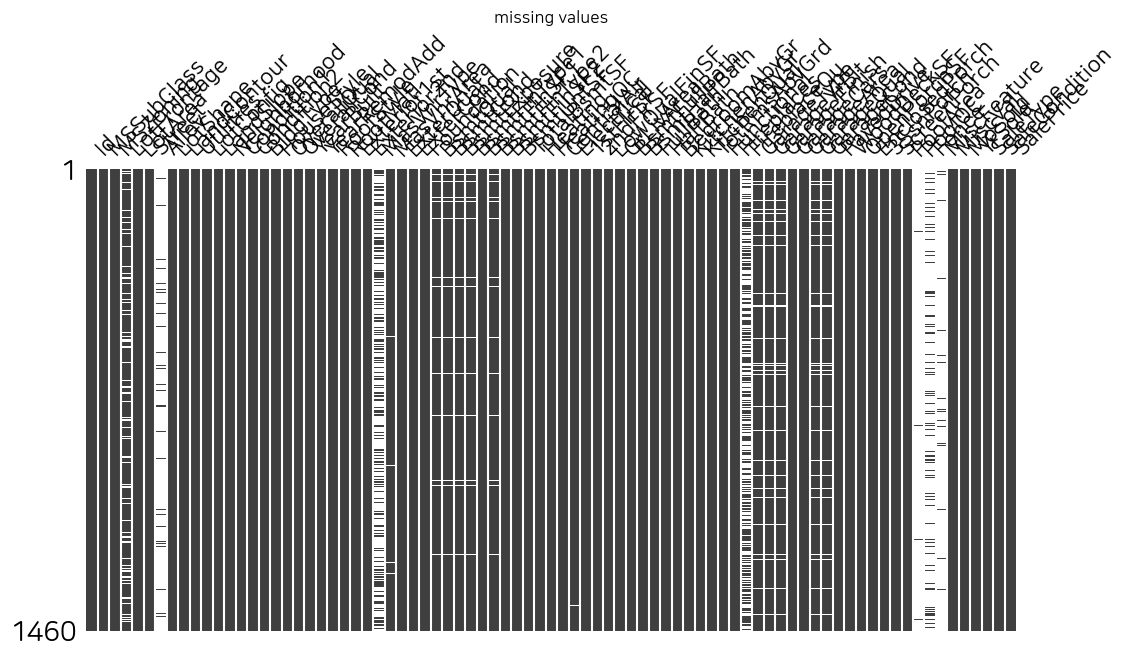

In [60]:
fig, ax = plt.subplots(figsize=(12, 6))
msno.matrix(train, ax=ax, labels=True)
ax.set_title("missing values")

# ax 축 label의 폰트 크기 조정
plt.show()

# 수치형 변수 선택
- 컬럼 81개 중에서 수치형 변수(컬럼)만 딱 봅아내는 코드 필요
- 10개 이상의 변수를 가지고 시각화를 하려고 하면, 반복문 코드가 필요

In [61]:
import warnings
warnings.filterwarnings('ignore')

38 7 6


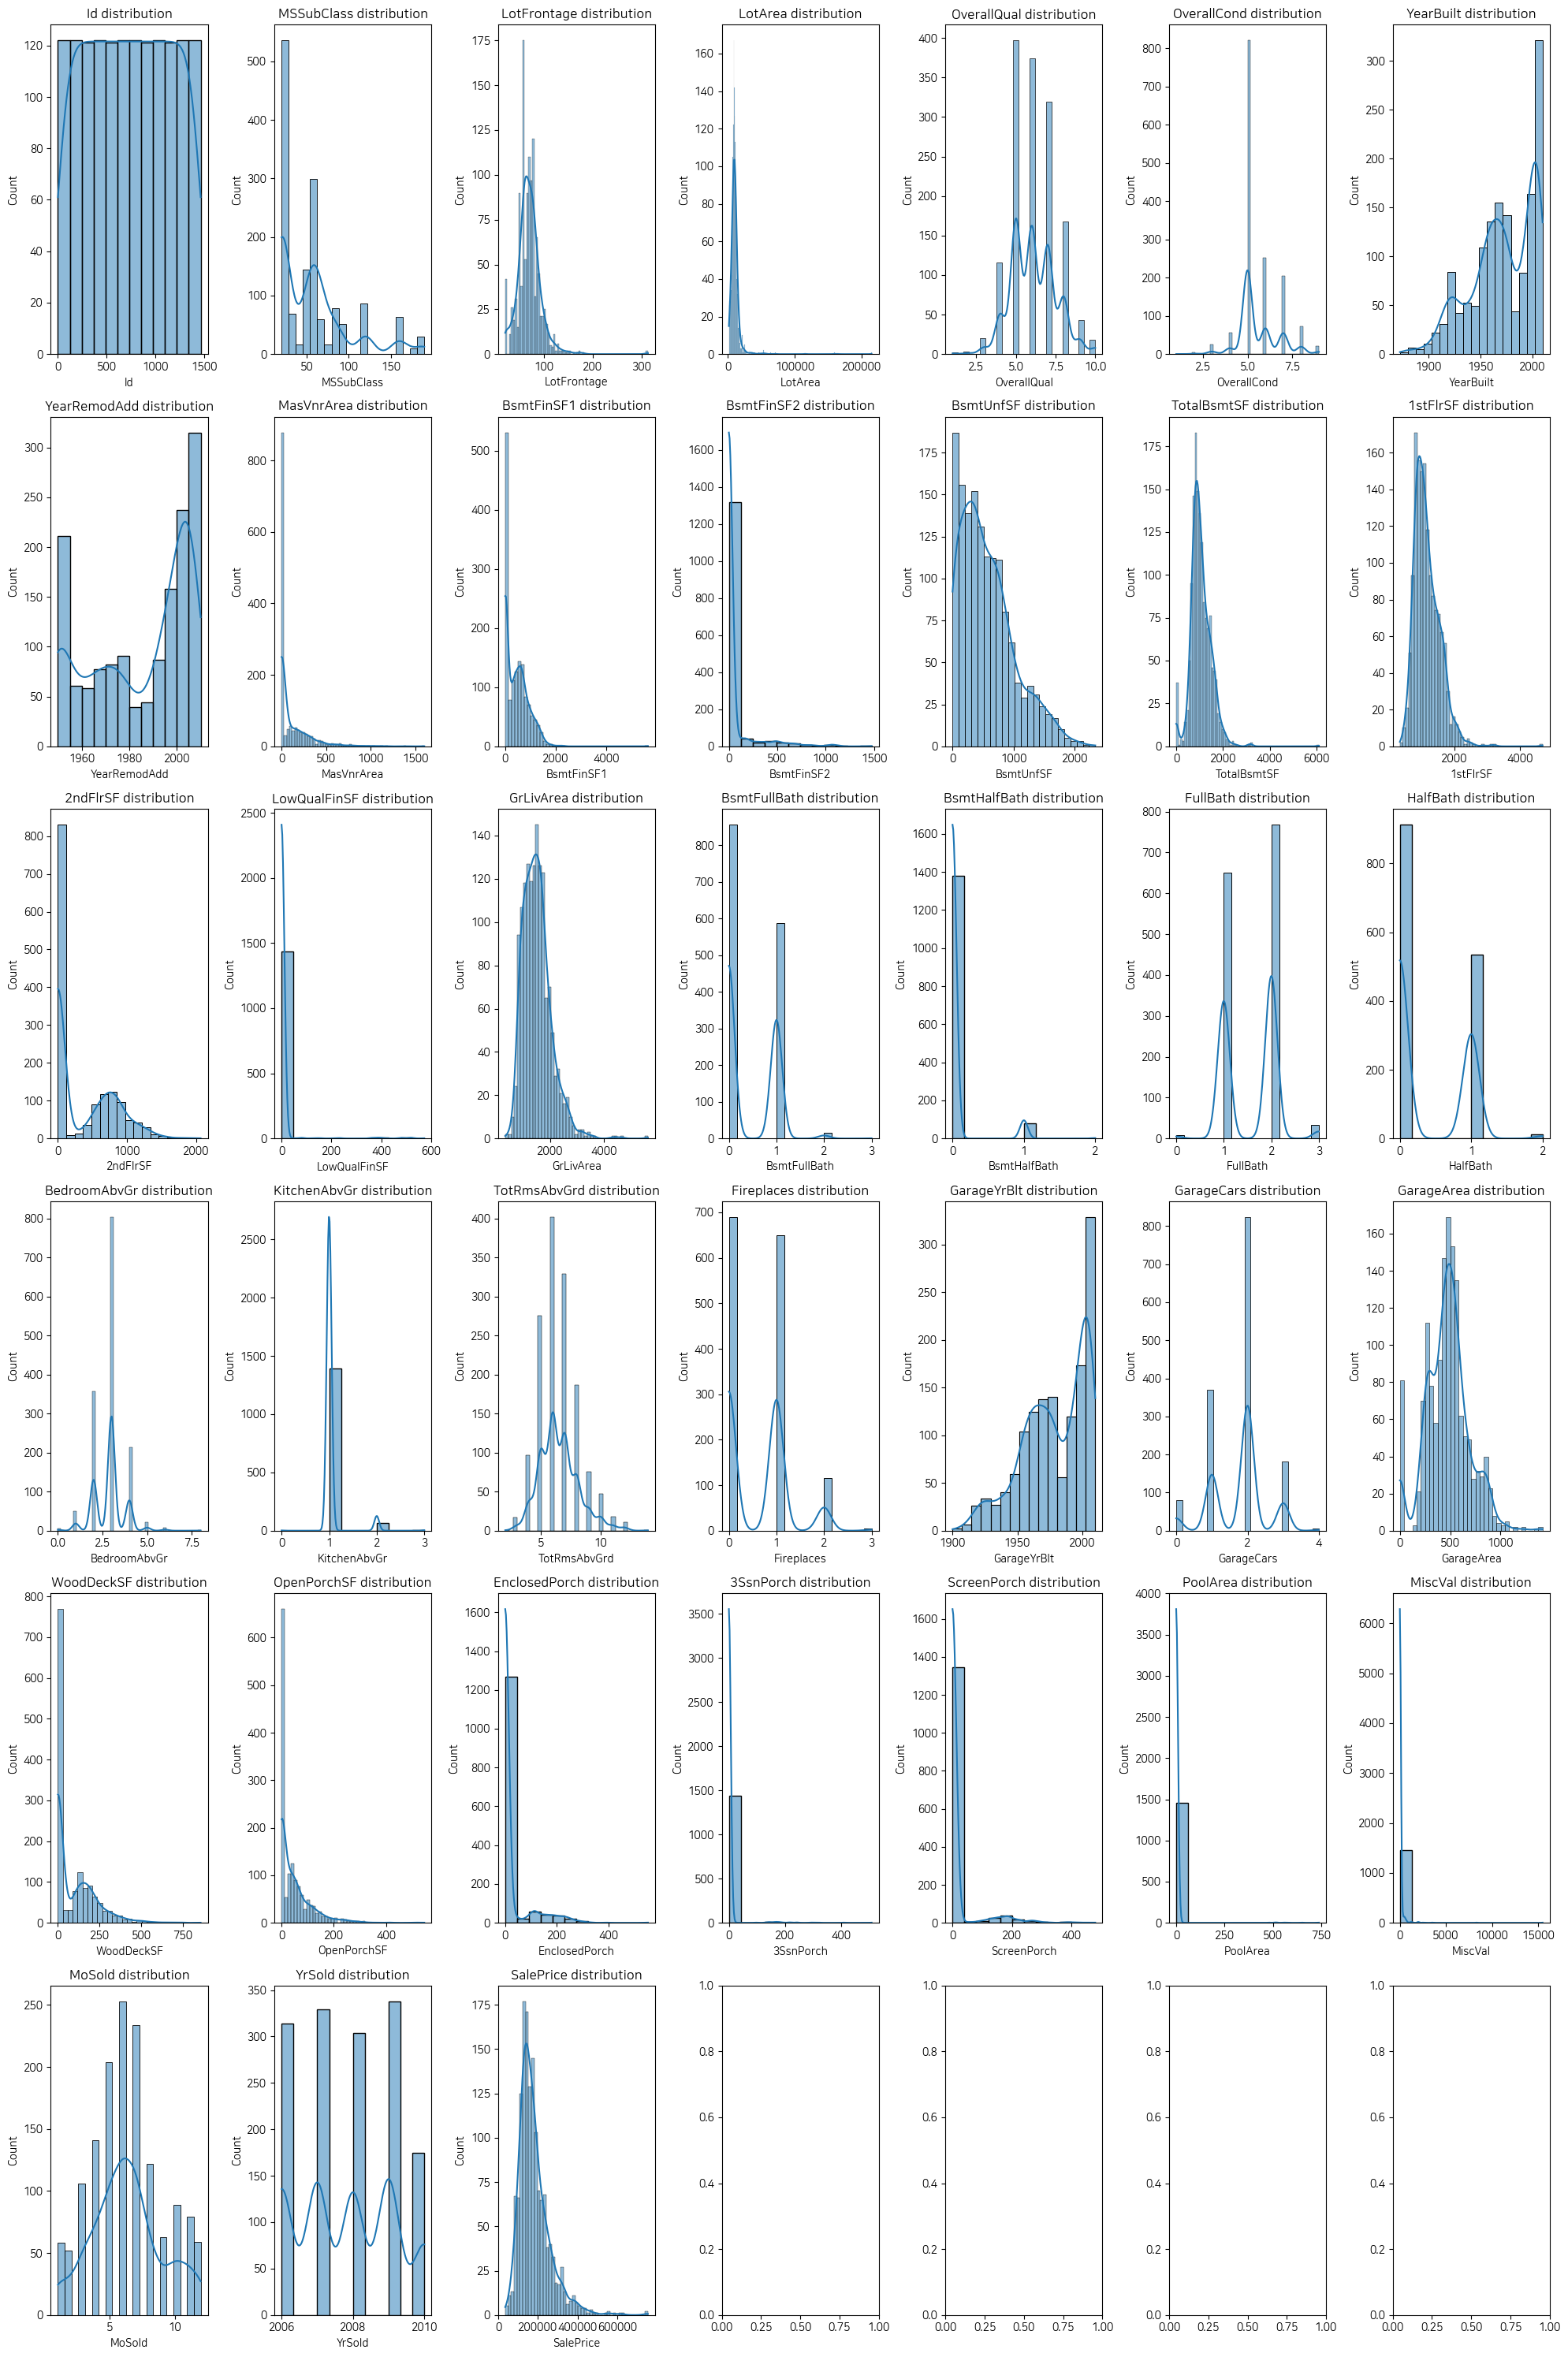

In [62]:
# 수치형 변수 선택
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

# 수치형 변수의 개수에 따라 행과 열 계산
n_vars = len(numeric_cols)
n_cols = 7
n_rows = (n_vars + n_cols - 1) // n_cols # 필요한 행 수 계산 
print(n_vars, n_cols, n_rows)

# 히스토그램
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
ax = ax.ravel() # 2차원 배열을 1차원으로 변환

for i, col in enumerate(numeric_cols):
    sns.histplot(data=train, x = col, kde=True, ax=ax[i])
    ax[i].set_title(f'{col} distribution')    

plt.tight_layout()
plt.show()

## 상관관계 분석

- 종속변수가 SalePrice, 주택가격
- SalePrice와 연관성이 강한 정도를 설정해서, 거기만 추려서 보자

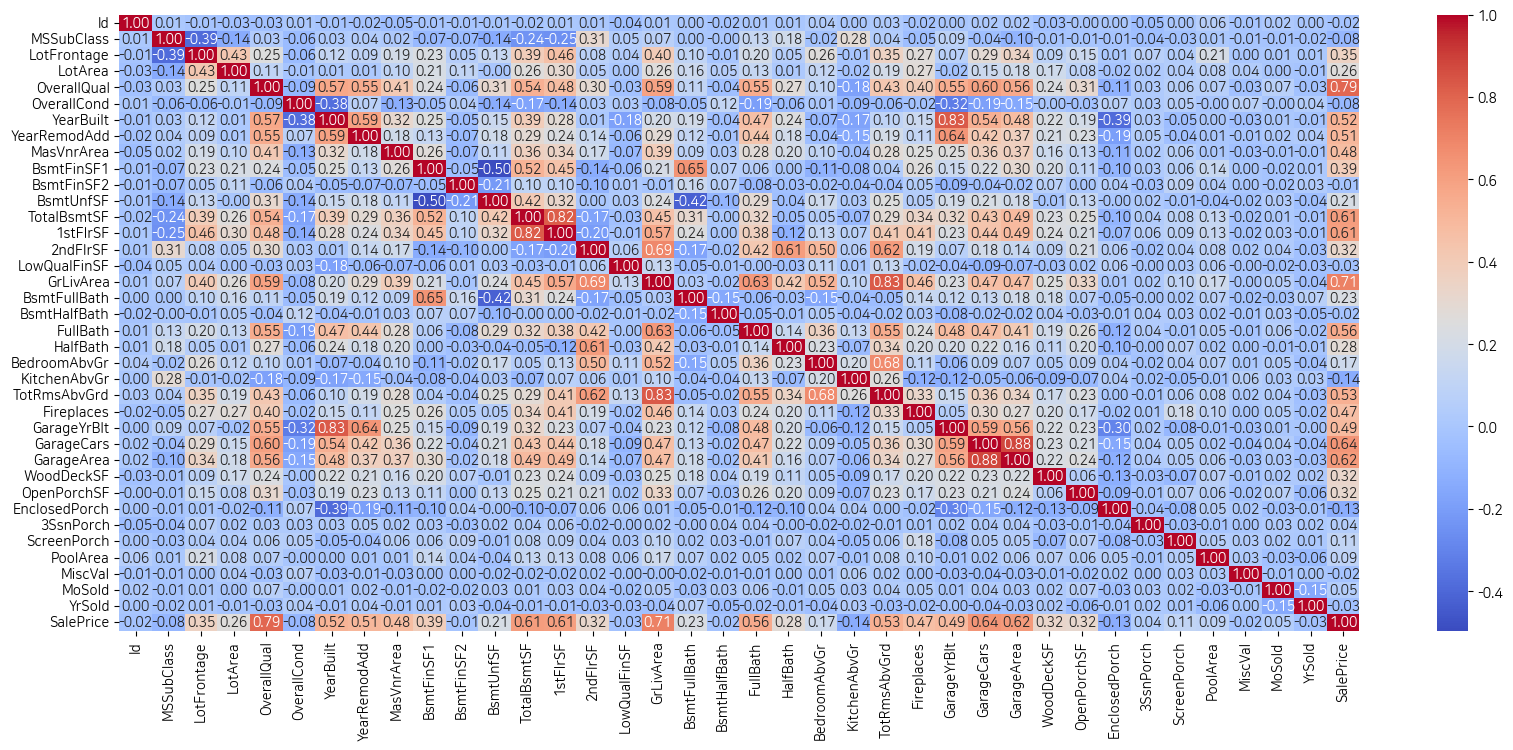

In [63]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(train[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=ax)

plt.show()

- 상관계수 임계점 지정해서 중요 변수만 추출
- 종속변수가 중심이어야 함

In [64]:
threshold = 0.5

# SalePrice와의 상관계수 계산
correlations = train[numeric_cols].corr()['SalePrice'].sort_values(ascending=False)
# correlations

important_features = correlations[abs(correlations) > threshold].index.tolist()
important_features.remove('SalePrice')
important_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

In [65]:
import matplotlib.font_manager as fm
', '.join(sorted([font.name for font in fm.fontManager.ttflist]))

'DejaVu Sans, DejaVu Sans, DejaVu Sans, DejaVu Sans, DejaVu Sans Display, DejaVu Sans Mono, DejaVu Sans Mono, DejaVu Sans Mono, DejaVu Sans Mono, DejaVu Serif, DejaVu Serif, DejaVu Serif, DejaVu Serif, DejaVu Serif Display, Humor Sans, Liberation Mono, Liberation Mono, Liberation Mono, Liberation Mono, Liberation Sans, Liberation Sans, Liberation Sans, Liberation Sans, Liberation Sans Narrow, Liberation Sans Narrow, Liberation Sans Narrow, Liberation Sans Narrow, Liberation Serif, Liberation Serif, Liberation Serif, Liberation Serif, NanumMyeongjo Eco, NanumMyeongjo Eco, NanumMyeongjo Eco, NanumSquareRound, NanumSquareRound, NanumSquareRound, NanumSquareRound, STIXGeneral, STIXGeneral, STIXGeneral, STIXGeneral, STIXNonUnicode, STIXNonUnicode, STIXNonUnicode, STIXNonUnicode, STIXSizeFiveSym, STIXSizeFourSym, STIXSizeFourSym, STIXSizeOneSym, STIXSizeOneSym, STIXSizeThreeSym, STIXSizeThreeSym, STIXSizeTwoSym, STIXSizeTwoSym, cmb10, cmex10, cmmi10, cmr10, cmss10, cmsy10, cmtt10'

In [66]:
fontpaths = '/kaggle/input/'
font_list = fm.findSystemFonts(fontpaths = fontpaths, fontext='ttf')
for font_file in font_list:
    fm.fontManager.addfont(font_file)
fm._load_fontmanager(try_read_cache=False)

', '.join(sorted([font.name for font in fm.fontManager.ttflist]))

'DejaVu Sans, DejaVu Sans, DejaVu Sans, DejaVu Sans, DejaVu Sans Display, DejaVu Sans Mono, DejaVu Sans Mono, DejaVu Sans Mono, DejaVu Sans Mono, DejaVu Serif, DejaVu Serif, DejaVu Serif, DejaVu Serif, DejaVu Serif Display, Humor Sans, Liberation Mono, Liberation Mono, Liberation Mono, Liberation Mono, Liberation Sans, Liberation Sans, Liberation Sans, Liberation Sans, Liberation Sans Narrow, Liberation Sans Narrow, Liberation Sans Narrow, Liberation Sans Narrow, Liberation Serif, Liberation Serif, Liberation Serif, Liberation Serif, NanumMyeongjo Eco, NanumMyeongjo Eco, NanumMyeongjo Eco, NanumMyeongjo Eco, NanumMyeongjo Eco, NanumMyeongjo Eco, NanumSquareRound, NanumSquareRound, NanumSquareRound, NanumSquareRound, NanumSquareRound, NanumSquareRound, NanumSquareRound, NanumSquareRound, STIXGeneral, STIXGeneral, STIXGeneral, STIXGeneral, STIXNonUnicode, STIXNonUnicode, STIXNonUnicode, STIXNonUnicode, STIXSizeFiveSym, STIXSizeFourSym, STIXSizeFourSym, STIXSizeOneSym, STIXSizeOneSym, STI

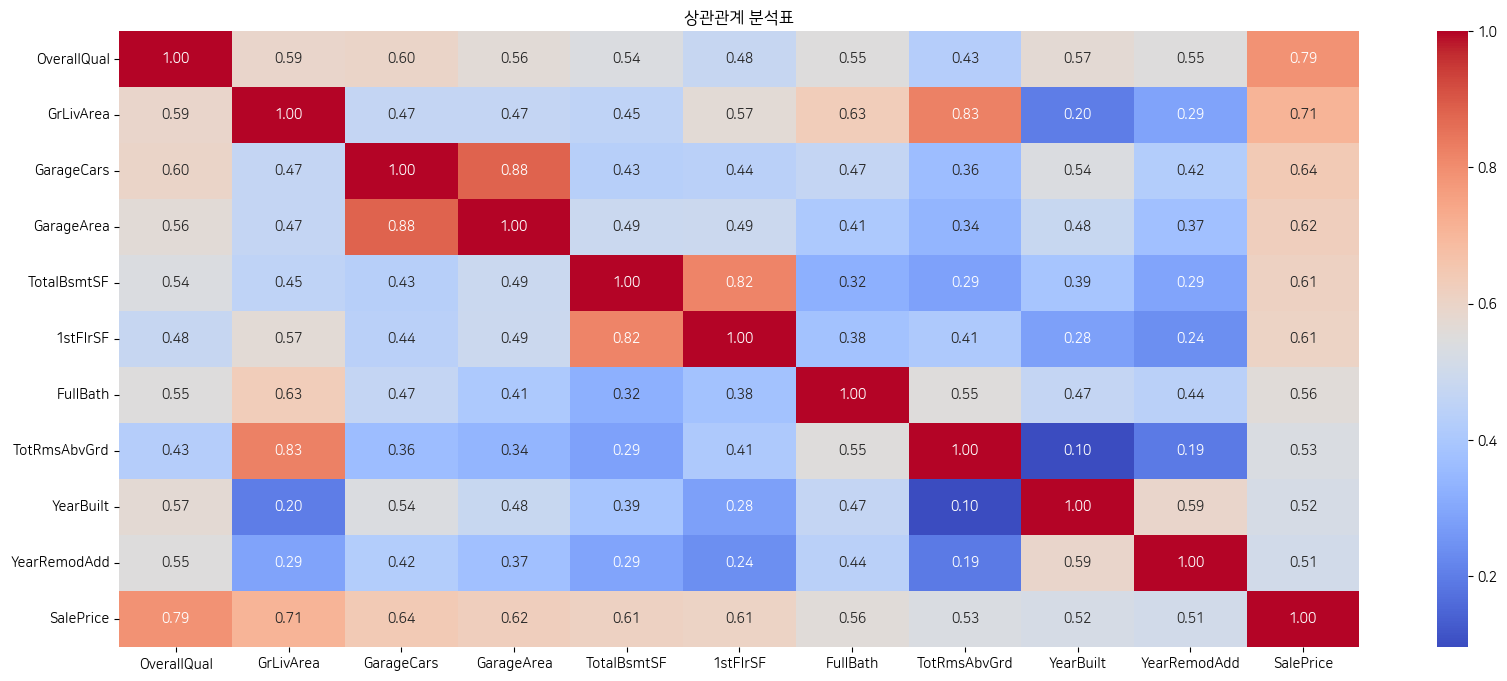

In [67]:
plt.rcParams['font.family'] = 'NanumSquareRound'

fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(train[important_features + ['SalePrice']].corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=ax)
ax.set_title("상관관계 분석표")

plt.show()

# 범주형 변수 출력 
- sns.countplot() 활용해서 다중 변수 한꺼번에 시각화

43 5 9


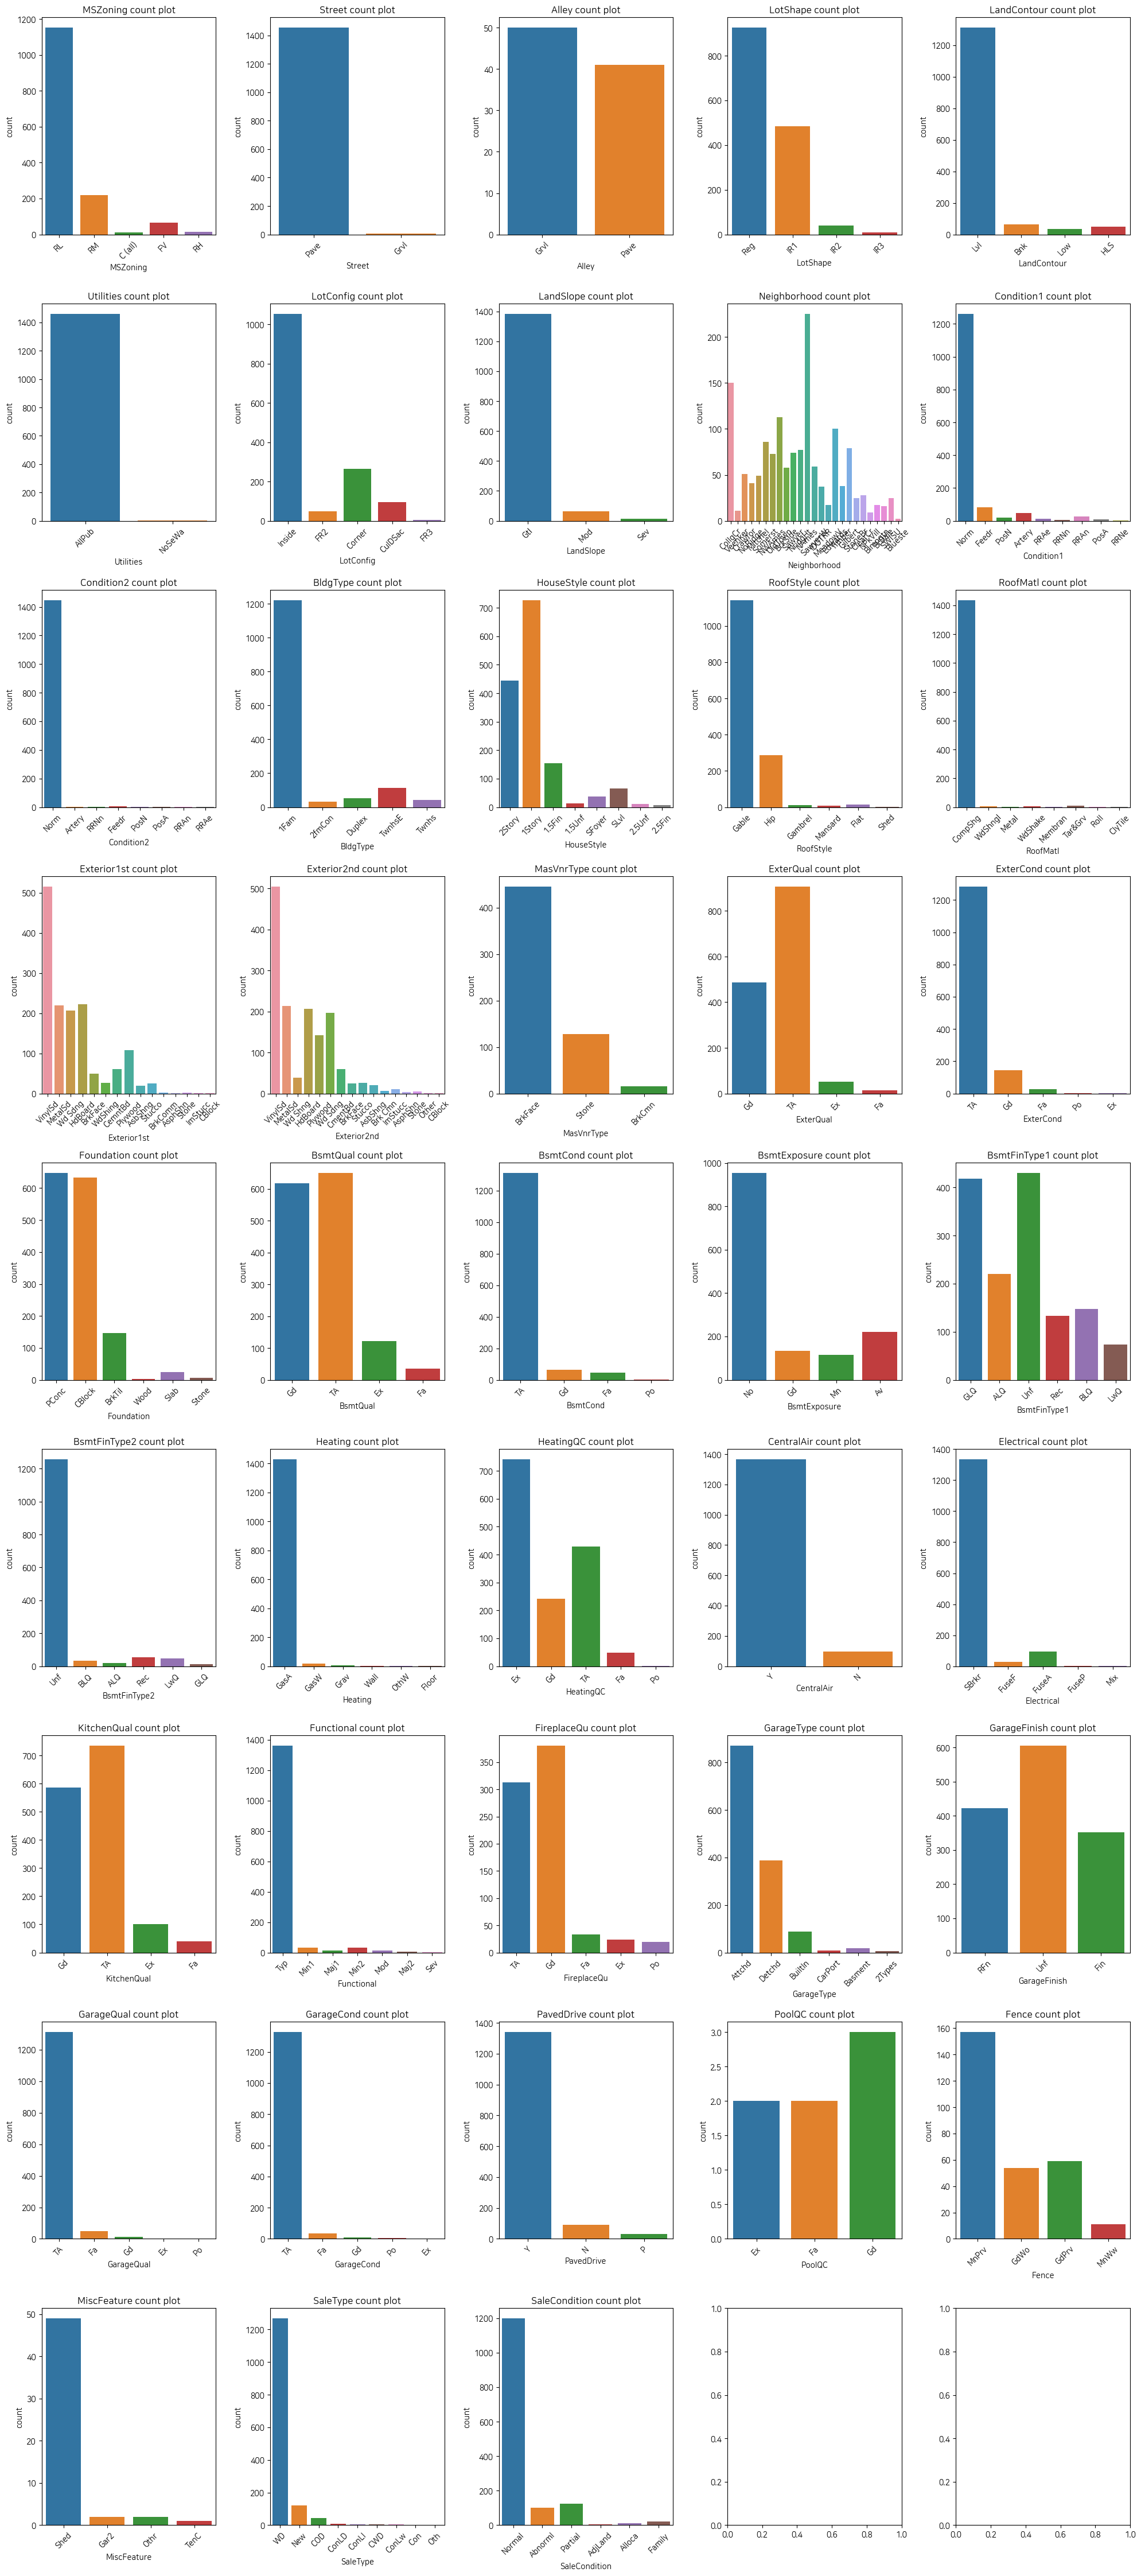

In [68]:
# 범주형 변수 선택
categorical_cols = train.select_dtypes(include=['object']).columns

# 수치형 변수의 개수에 따라 행과 열 계산
n_vars = len(categorical_cols)
n_cols = 5
n_rows = (n_vars + n_cols - 1) // n_cols # 필요한 행 수 계산 
print(n_vars, n_cols, n_rows)

# 히스토그램
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
ax = ax.ravel() # 2차원 배열을 1차원으로 변환

for i, col in enumerate(categorical_cols):
    sns.countplot(data=train, x = col, ax=ax[i])
    ax[i].set_title(f'{col} count plot')    
    ax[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

# 이상치 분석 
- 이상치 분석 Outlier
  + 데이터가 정상적으로 잘 들어오고 있는지 확인하는 목적
- 예시
  + 한 여름에 기상청 어떤 특정 지역에서 -10도 (이상치, 정상적인 데이터 X) ==> 원인 파악
- 수치 데이터 (급여)
    + 이상치 판단하는 임계점(언제나 다름)
    + 사회복지 : 소득분위 10분위로 나눠서 판단
    + 국세청 : 고소득자에 대해 세금을 부과할 때 임계점 

## Z-Score 기반
- IQR 기반으로 하는 방법
- 표준편차를 기반으로 하는 방법 

In [69]:
# 분석의 주제를 기반으로 우선순위 파악
z_scores = np.abs(stats.zscore(train['SalePrice']))

# Z-Score 3 이상이면 데이터를 이상치로 판단
outliers = z_scores > 3

# 이상치 개수 파악 
print(outliers.sum())

22


- 박스플롯 시각화 

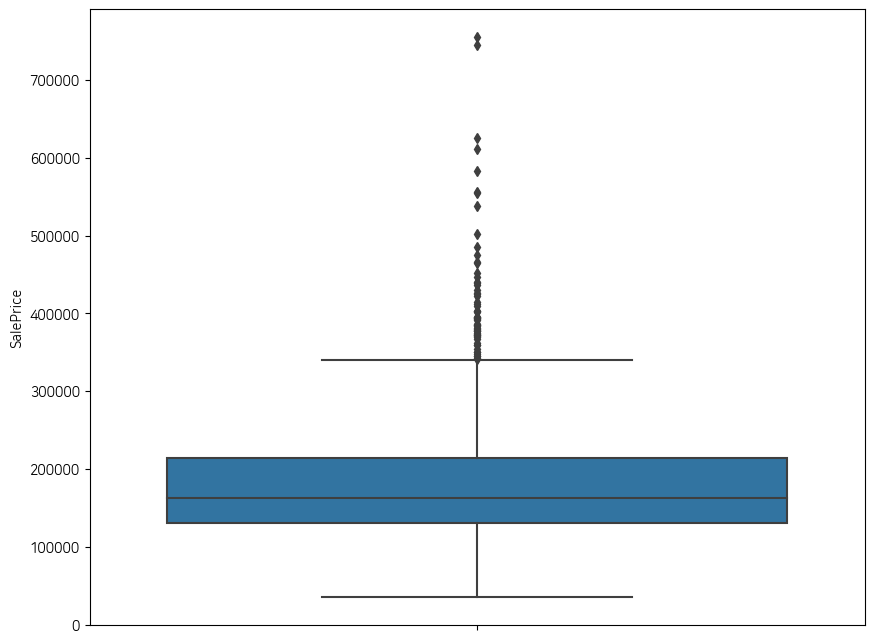

In [70]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(y=train['SalePrice'], ax=ax)
plt.show()

# 이상치 데이터 확인

In [71]:
train[outliers][['SalePrice']].sort_values('SalePrice', ascending=False)

,SalePrice
691,755000
1182,745000
1169,625000
898,611657
803,582933
1046,556581
440,555000
769,538000
178,501837
798,485000


In [72]:
# 원본 데이터 복제
train2 = train.copy()
train2.shape, train.shape

((1460, 81), (1460, 81))

In [73]:
# 이상치 제거 
train2 = train2[~outliers]
train2.shape, train.shape

((1438, 81), (1460, 81))

# 결측치 처리 전/후 비교 시각화

In [74]:
train3 = train2.copy()

In [75]:
"""
col = 'Alley'

train4 = train3.copy()
print(train4[col].isnull().sum())

train4[col].fillna(train4[col].mode()[0], inplace=True)
print(train4[col].isnull().sum())
"""

"\ncol = 'Alley'\n\ntrain4 = train3.copy()\nprint(train4[col].isnull().sum())\n\ntrain4[col].fillna(train4[col].mode()[0], inplace=True)\nprint(train4[col].isnull().sum())\n"

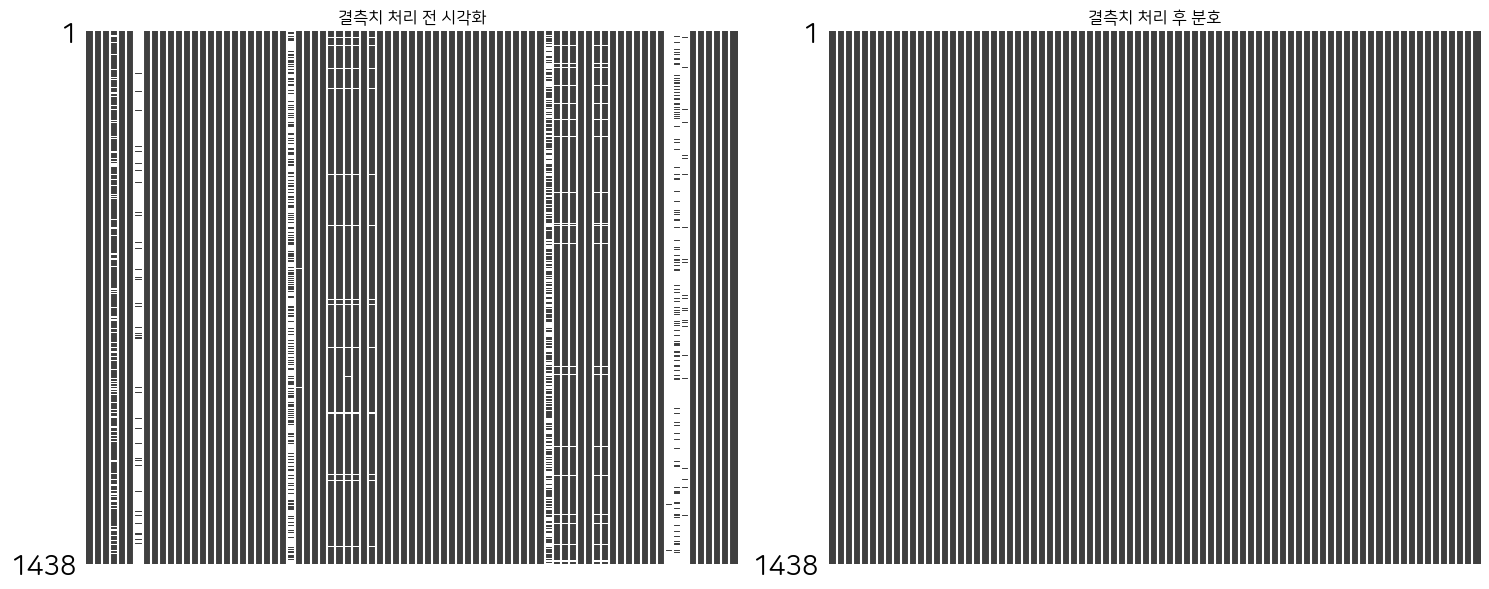

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# ax1
msno.matrix(train2, ax=ax1)
ax1.set_title("결측치 처리 전 시각화")

# ax2
train3 = train2.copy() # 결측치를 처리하기 위해 데이터 복제

# Check 해당 특정 컬럼이 결측치가 존재하는가? 
for col in train3.columns:
    missing_ratio = train3[col].isnull().mean() * 100
    if missing_ratio > 0:
        # print(f"{col} : {missing_ratio:.2f}% 결측치")
        # 수치형 변수 평균 대치 결측치 처리 코드 작성
        if train3[col].dtype in ['int64', 'float64']:
            # print("------ 수치형 변수 : 평균값으로 대체 중 -------")
            train3[col].fillna(train3[col].mean(), inplace=True)
        else:
            
        # 범주형 변수 최빈값으로 대체
            # print("------ 범주형 변수 : 최반값으로 대체 중 -------")
            train3[col].fillna(train3[col].mode()[0], inplace=True)

msno.matrix(train3, ax=ax2)
ax2.set_title("결측치 처리 후 분호")

plt.tight_layout()
plt.show()

# 수치형 변수 예시: GrLivArea와 SalePrice의 상관관계 & 회귀분석

## 상관관계 분석
- 상관관계 분석 가설 설정
    + H0 (귀무가설): GrLivArea와 SalePrice 간에는 선형적 관계가 없다 (β = 0)
    + H1 (대립가설): GrLivArea와 SalePrice 간에는 선형적 관계가 있다 (β ≠ 0)
- 유의수준: α = 0.05


=== 상관분석 ===
GrLivArea와 SalePrice의 상관계수: 0.6705


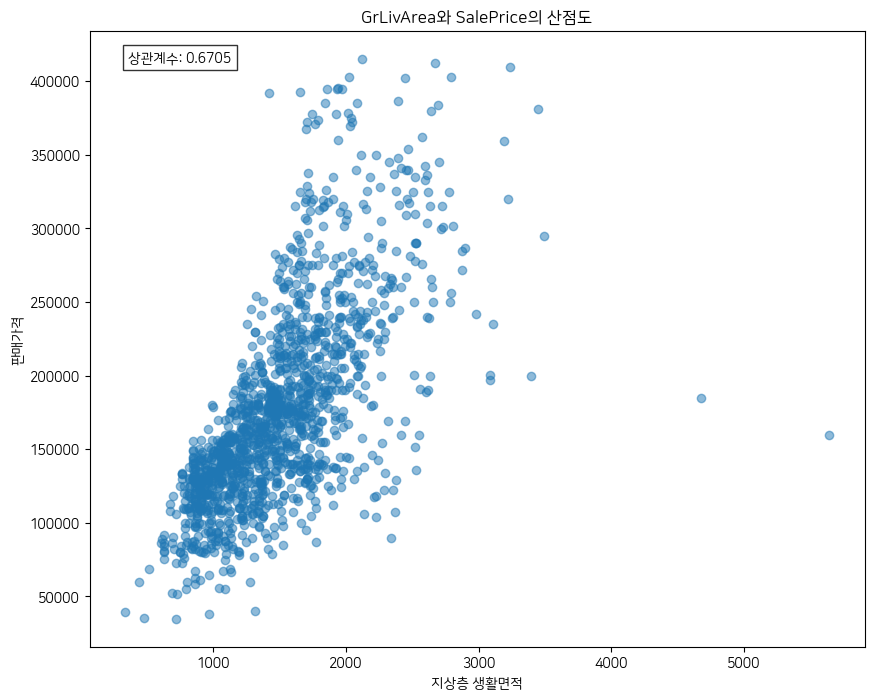

In [77]:
# 상관계수 계산
correlation = train3['GrLivArea'].corr(train3['SalePrice'])
print(f"\n=== 상관분석 ===")
print(f"GrLivArea와 SalePrice의 상관계수: {correlation:.4f}")

# 산점도 그리기
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(train3['GrLivArea'], train3['SalePrice'], alpha=0.5)

# 상관계수를 그래프에 표시
ax.text(0.05, 0.95, f'상관계수: {correlation:.4f}',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.8))

ax.set_title('GrLivArea와 SalePrice의 산점도')
ax.set_xlabel('지상층 생활면적')
ax.set_ylabel('판매가격')
plt.show()

## 회귀분석
- 회귀분석 가설 설정
    + H0 (귀무가설): GrLivArea와 SalePrice 간의 회귀선 기울기가 0이다 (β = 0)
    + H1 (대립가설): GrLivArea와 SalePrice 간의 회귀선 기울기가 0이 아니다 (β ≠ 0)
- 유의수준: α = 0.05

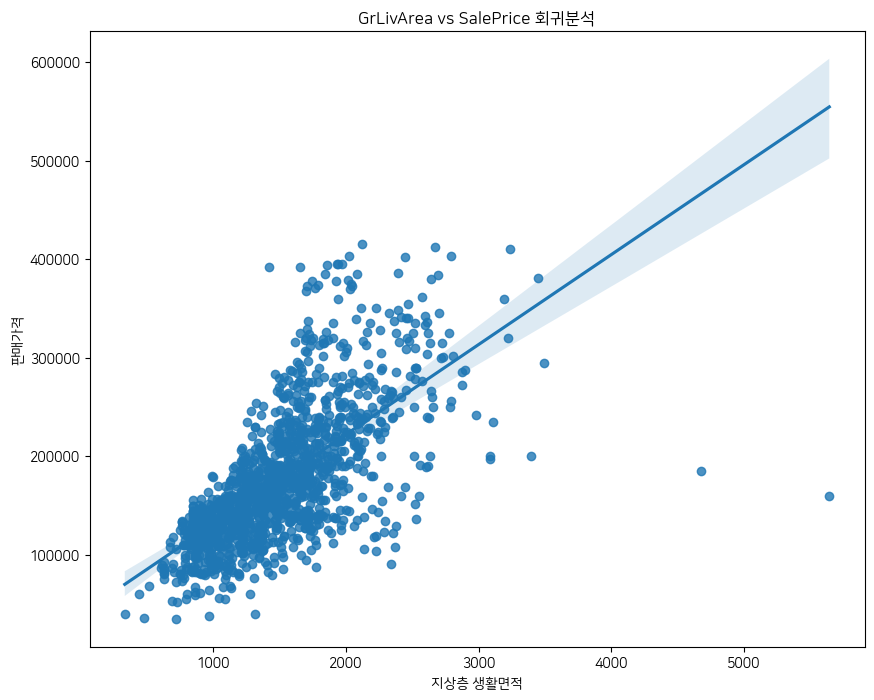

In [78]:
# GrLivArea와 SalePrice의 회귀분석
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 산점도와 회귀선 시각화
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(data=train3, x='GrLivArea', y='SalePrice', ax=ax)
ax.set_title('GrLivArea vs SalePrice 회귀분석')
ax.set_xlabel('지상층 생활면적')
ax.set_ylabel('판매가격')
plt.show()

- 회귀분석 프로세스 정리
1. 모형 만들기
    - 단순회귀모형 적합: y = β0 + β1x + ε
    - statsmodels 라이브러리 사용하여 회귀분석 수행

2. 기울기(β1) 확인 및 유의성 검정
    - t-검정을 통한 기울기의 통계적 유의성 확인
    - p-value < α이면 귀무가설 기각 (기울기≠0)

3. 모형의 적합도 평가
    - R-squared 값 확인
    - F-검정을 통한 모형의 전반적 유의성 검정

4. 잔차분석
    - 정규성: Q-Q plot, Shapiro-Wilk 검정
    - 선형성: Residual vs Fitted plot
    - 등분산성: Scale-Location plot, Breusch-Pagan 검정
    - 독립성: Durbin-Watson 검정

In [79]:
# 회귀모형 적합
model = smf.ols(formula='SalePrice ~ GrLivArea', data=train3).fit()

# 회귀분석 결과 출력
print("=== 회귀분석 결과 ===")
print(model.summary())

=== 회귀분석 결과 ===
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     1173.
Date:                Tue, 08 Apr 2025   Prob (F-statistic):          2.15e-188
Time:                        05:36:46   Log-Likelihood:                -17601.
No. Observations:                1438   AIC:                         3.521e+04
Df Residuals:                    1436   BIC:                         3.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.93e+04   4200.195    


=== 잔차 정규성 검정(Shapiro-Wilk) ===
통계량: 0.9423
p-value: 2.9863e-23


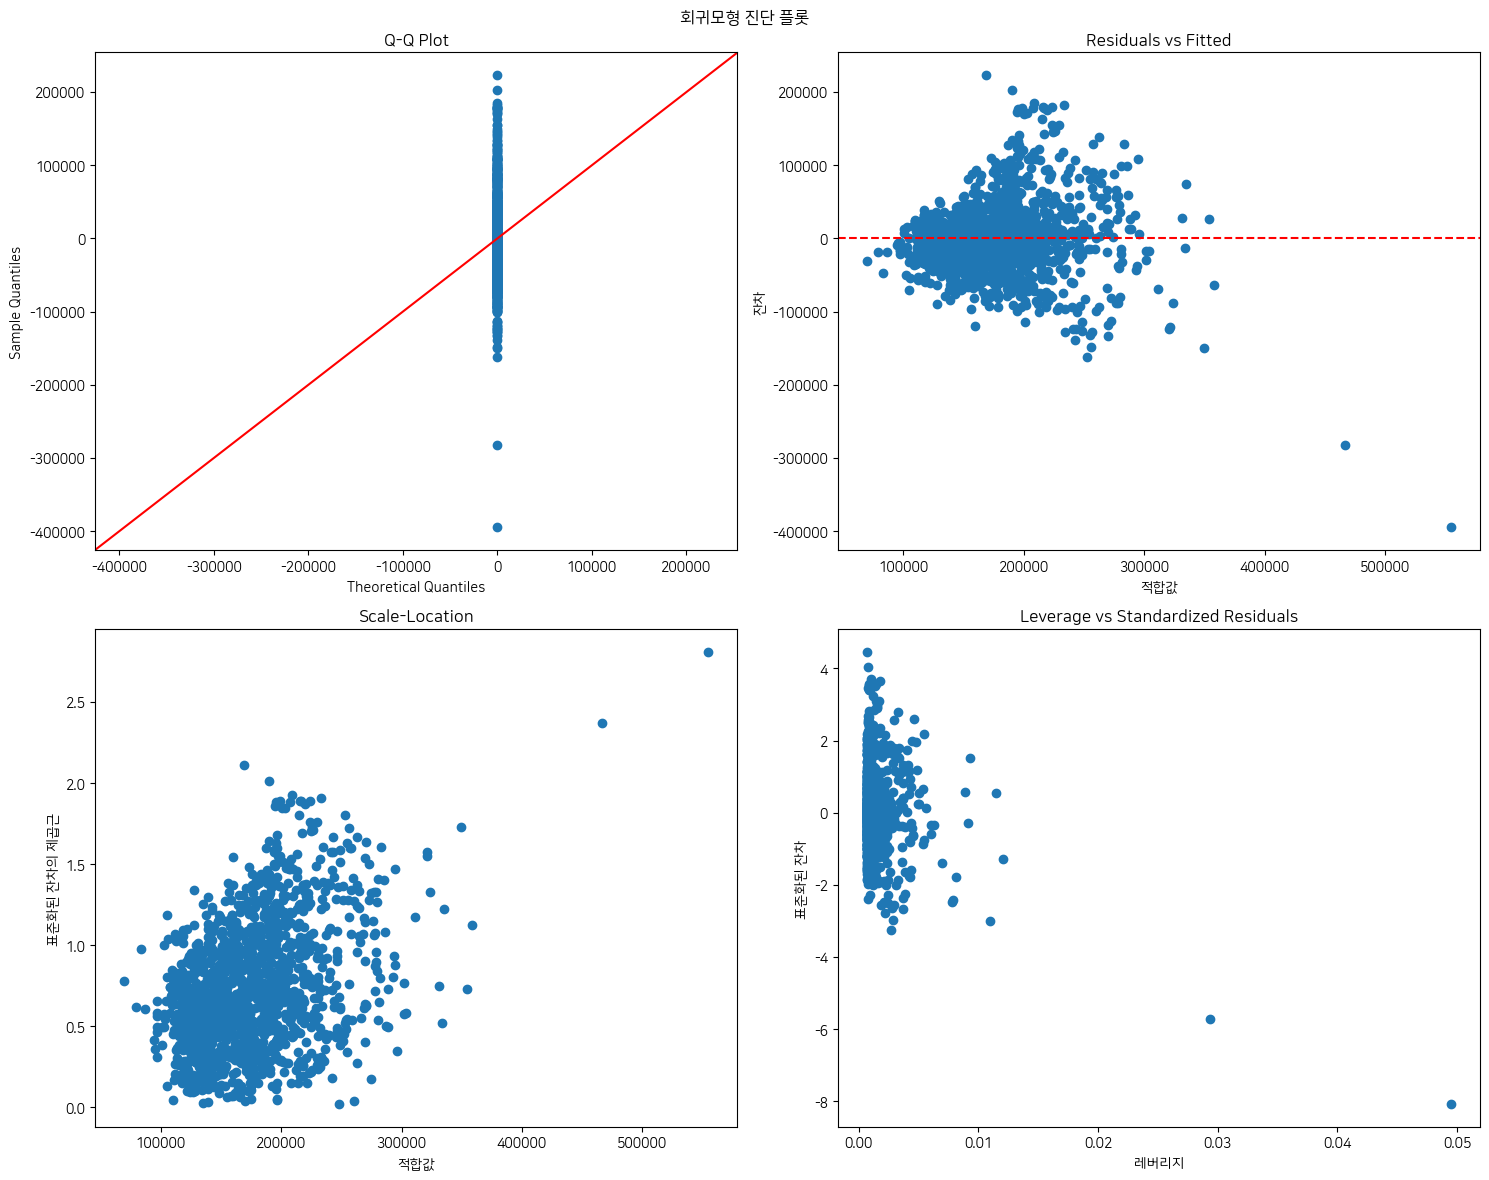

In [80]:
# 잔차 분석
residuals = model.resid
fitted_values = model.fittedvalues

# 1. 잔차의 정규성 검정
# Q-Q plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('회귀모형 진단 플롯')

# Q-Q plot
sm.graphics.qqplot(residuals, line='45', ax=axes[0,0])
axes[0,0].set_title('Q-Q Plot')

# Shapiro-Wilk 검정
stat, p_value = stats.shapiro(residuals)
print("\n=== 잔차 정규성 검정(Shapiro-Wilk) ===")
print(f"통계량: {stat:.4f}")
print(f"p-value: {p_value:.4e}")

# 2. 잔차 vs 적합값 플롯 (선형성, 등분산성 확인)
axes[0,1].scatter(fitted_values, residuals)
axes[0,1].axhline(y=0, color='r', linestyle='--')
axes[0,1].set_xlabel('적합값')
axes[0,1].set_ylabel('잔차')
axes[0,1].set_title('Residuals vs Fitted')

# 3. Scale-Location 플롯 (등분산성)
standardized_residuals = np.sqrt(np.abs(stats.zscore(residuals)))
axes[1,0].scatter(fitted_values, standardized_residuals)
axes[1,0].set_xlabel('적합값')
axes[1,0].set_ylabel('표준화된 잔차의 제곱근')
axes[1,0].set_title('Scale-Location')

# 4. 레버리지 vs 표준화된 잔차
influence = model.get_influence()
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal
axes[1,1].scatter(leverage, standardized_residuals)
axes[1,1].set_xlabel('레버리지')
axes[1,1].set_ylabel('표준화된 잔차')
axes[1,1].set_title('Leverage vs Standardized Residuals')

plt.tight_layout()
plt.show()

- 등분산성 가설검정
    + H0 (귀무가설): 잔차의 분산이 일정하다 (등분산성 만족)
    + H1 (대립가설): 잔차의 분산이 일정하지 않다 (이분산성)
    + 유의수준: α = 0.05
    + 검정방법: Breusch-Pagan 검정

In [81]:
# Breusch-Pagan 검정 (등분산성)
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, model.model.exog)
print("\n=== 등분산성 검정(Breusch-Pagan) ===")
print(f"통계량: {bp_test[0]:.4f}")
print(f"p-value: {bp_test[1]:.4e}")


=== 등분산성 검정(Breusch-Pagan) ===
통계량: 243.5402
p-value: 6.6498e-55


In [82]:
# Durbin-Watson 검정 (독립성)
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print("\n=== 독립성 검정(Durbin-Watson) ===")
print(f"Durbin-Watson 통계량: {dw_stat:.4f}")


=== 독립성 검정(Durbin-Watson) ===
Durbin-Watson 통계량: 2.0392


## 회귀분석 결과 해석

1. 정규성 검정 (Shapiro-Wilk)
- p-value가 매우 작음 -> 잔차가 정규분포를 따르지 않음
- 대처방법:
  - 종속변수(SalePrice) 변환 (로그, 제곱근 등)
  - 비모수적 방법 고려
  - 표본 크기가 큰 경우 중심극한정리에 의해 크게 문제되지 않음

2. 등분산성 검정 (Breusch-Pagan)
- p-value가 매우 작음 -> 이분산성 존재
- 대처방법:
  - Weighted Least Squares (WLS) 사용
  - 종속변수 변환
  - 이분산성을 고려한 표준오차 사용 (robust standard errors)
  - 변수 변환 (로그, 제곱근 등)

3. 독립성 검정 (Durbin-Watson)
- DW 통계량이 2에 가까우면 자기상관 없음
- 0에 가까우면 양의 자기상관, 4에 가까우면 음의 자기상관
- 대처방법:
  - 시계열 모형 고려 (AR, MA, ARIMA 등)
  - GLS(Generalized Least Squares) 사용
  - 누락된 중요 변수 검토

# 범주형 변수 예시: Neighborhood별 SalePrice 차이 분석
- 분산분석(ANOVA) 프로세스

1. 가정 검토
    - 정규성: Shapiro-Wilk test
        + 각 집단(Neighborhood)의 SalePrice가 정규분포를 따르는지 검정
        + p < 0.05이면 정규성 가정 위배
    - 등분산성: Levene test 
        + 모든 집단의 분산이 동일한지 검정
        + p < 0.05이면 등분산성 가정 위배

2. 분산분석(ANOVA)
    - 귀무가설: 모든 집단의 평균이 동일하다
    - 대립가설: 적어도 하나의 집단 평균이 다르다
    - p < 0.05이면 집단 간 유의한 차이 존재

3. 사후검정
    - Tukey's HSD(Honestly Significant Difference) test
    - 어떤 집단 간에 유의한 차이가 있는지 쌍별 비교
    - 다중비교 문제를 보정하여 Type I 오류 통제

## 범주별 분포 시각화

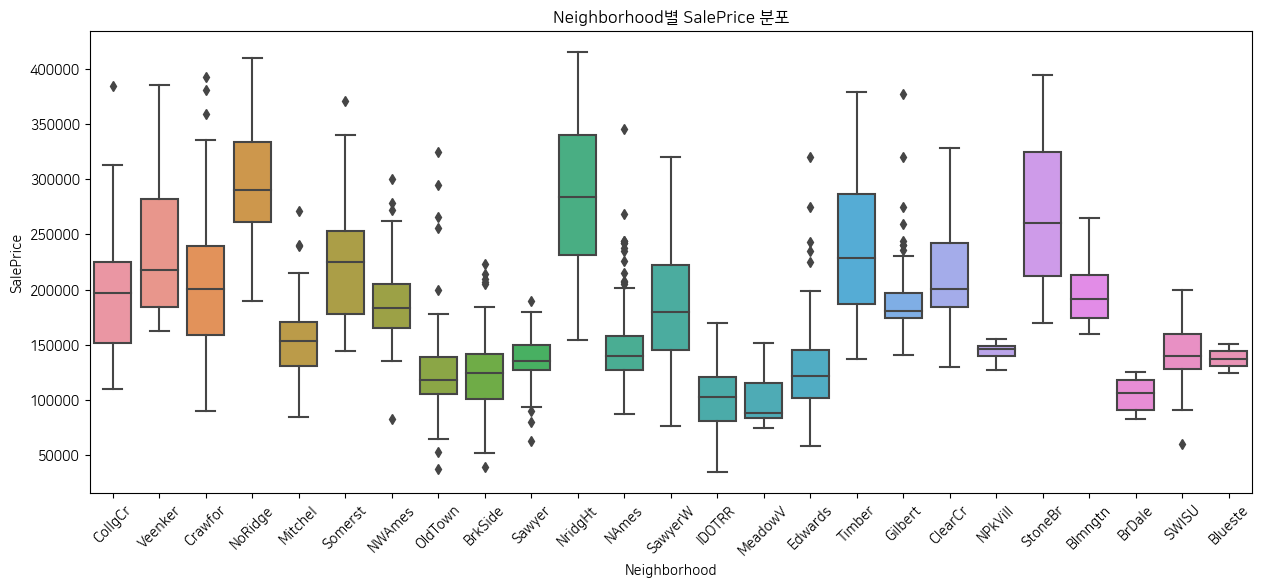

In [83]:
# Neighborhood별 SalePrice 분포 시각화
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(data=train3, x='Neighborhood', y='SalePrice', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Neighborhood별 SalePrice 분포')
plt.show()

## 기술통계량

In [84]:
# 각 Neighborhood별 기술통계량
train3.groupby('Neighborhood')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Blmngtn,17.0,194870.882353,30393.229219,159895.0,174000.0,191000.0,213490.00,264561.0
Blueste,2.0,137500.000000,19091.883092,124000.0,130750.0,137500.0,144250.00,151000.0
BrDale,16.0,104493.750000,14330.176493,83000.0,91000.0,106000.0,118000.00,125000.0
BrkSide,58.0,124834.051724,40348.689270,39300.0,100500.0,124300.0,141175.00,223500.0
ClearCr,28.0,212565.428571,50231.538993,130000.0,183750.0,200250.0,242225.00,328000.0
CollgCr,149.0,196442.926174,48062.257839,110000.0,152000.0,196500.0,224900.00,383970.0
Crawfor,51.0,210624.725490,68866.395472,90350.0,159250.0,200624.0,239000.00,392500.0
Edwards,100.0,128219.700000,43208.616459,58500.0,101500.0,121750.0,145225.00,320000.0
Gilbert,79.0,192854.506329,35986.779085,141000.0,174000.0,181000.0,197200.00,377500.0


## 정규성 검정
- 각 그룹별 SalePrice에 대한 정규성 검정

In [85]:
# 정규성 검정 (Shapiro-Wilk test)
print("\n=== 각 Neighborhood별 정규성 검정 결과 ===")
print("분석 대상 컬럼:")
print("- Neighborhood: 주거 지역 구분")
print("- SalePrice: 주택 판매 가격\n")

for neighborhood in train3['Neighborhood'].unique():
    neighborhood_data = train3[train3['Neighborhood'] == neighborhood]['SalePrice']
    print(f"{neighborhood}:")
    print(f"  데이터 수: {len(neighborhood_data)}개")
    if len(neighborhood_data) >= 3:  # Shapiro-Wilk test requires at least 3 data points
        stat, p_value = stats.shapiro(neighborhood_data)
        print(f"Shapiro-Wilk 통계량: {stat:.4f}")
        print(f"p-value: {p_value:.4e}")
    else:
        print("데이터 수가 부족하여 정규성 검정을 수행할 수 없습니다 (최소 3개 필요)")


=== 각 Neighborhood별 정규성 검정 결과 ===
분석 대상 컬럼:
- Neighborhood: 주거 지역 구분
- SalePrice: 주택 판매 가격

CollgCr:
  데이터 수: 149개
Shapiro-Wilk 통계량: 0.9651
p-value: 7.8437e-04
Veenker:
  데이터 수: 11개
Shapiro-Wilk 통계량: 0.9093
p-value: 2.3924e-01
Crawfor:
  데이터 수: 51개
Shapiro-Wilk 통계량: 0.9494
p-value: 2.9694e-02
NoRidge:
  데이터 수: 36개
Shapiro-Wilk 통계량: 0.9595
p-value: 2.0810e-01
Mitchel:
  데이터 수: 49개
Shapiro-Wilk 통계량: 0.9410
p-value: 1.6131e-02
Somerst:
  데이터 수: 85개
Shapiro-Wilk 통계량: 0.9594
p-value: 9.0866e-03
NWAmes:
  데이터 수: 73개
Shapiro-Wilk 통계량: 0.9551
p-value: 1.0978e-02
OldTown:
  데이터 수: 112개
Shapiro-Wilk 통계량: 0.8214
p-value: 2.5078e-10
BrkSide:
  데이터 수: 58개
Shapiro-Wilk 통계량: 0.9644
p-value: 8.6490e-02
Sawyer:
  데이터 수: 74개
Shapiro-Wilk 통계량: 0.9667
p-value: 4.7824e-02
NridgHt:
  데이터 수: 67개
Shapiro-Wilk 통계량: 0.9689
p-value: 9.1093e-02
NAmes:
  데이터 수: 225개
Shapiro-Wilk 통계량: 0.8771
p-value: 1.5715e-12
SawyerW:
  데이터 수: 59개
Shapiro-Wilk 통계량: 0.9794
p-value: 4.1481e-01
IDOTRR:
  데이터 수: 37개
Shapiro-Wilk 통계량

- 일부 데이터 병합 필요

### 등분산성 검정

In [86]:
# 등분산성 검정 (Levene test)
neighborhoods = [group['SalePrice'].values for name, group in train3.groupby('Neighborhood')]
stat, p_value = stats.levene(*neighborhoods)
print("\n=== 등분산성 검정 결과 ===")
print(f"Levene 통계량: {stat:.4f}")
print(f"p-value: {p_value:.4e}")


=== 등분산성 검정 결과 ===
Levene 통계량: 10.0944
p-value: 1.2177e-34


In [88]:
# ANOVA 검정
# 등분산성 가정이 위배되어 Welch's ANOVA 사용
from statsmodels.stats.oneway import anova_oneway

# Neighborhood별로 SalePrice를 그룹화하여 리스트로 변환
neighborhood_groups = [group['SalePrice'].values for name, group in train3.groupby('Neighborhood')]

# Welch's ANOVA 수행
f_stat, p_value = anova_oneway(neighborhood_groups, use_var='unequal')

print("\n=== Welch's ANOVA 검정 결과 ===")
print(f"Welch's F-통계량: {f_stat:.4f}")
print(f"p-value: {p_value:.4e}")


=== Welch's ANOVA 검정 결과 ===
Welch's F-통계량: 67.4905
p-value: 2.8998e-58


### 사후검정 실시
- 결과 확인 결과 그룹간 비교 분석 필요


=== Tukey's HSD 사후검정 결과 ===
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
 group1  group2   meandiff   p-adj     lower        upper     reject
--------------------------------------------------------------------
Blmngtn Blueste  -57370.8824 0.9937 -181148.8261   66407.0614  False
Blmngtn  BrDale  -90377.1324    0.0 -148050.9154  -32703.3493   True
Blmngtn BrkSide  -70036.8306    0.0 -115703.3694  -24370.2919   True
Blmngtn ClearCr   17694.5462 0.9999  -33216.1109   68605.2033  False
Blmngtn CollgCr    1572.0438    1.0   -40815.902   43959.9897  False
Blmngtn Crawfor   15753.8431    1.0  -30617.6232   62125.3095  False
Blmngtn Edwards  -66651.1824    0.0 -110089.6396  -23212.7252   True
Blmngtn Gilbert    -2016.376    1.0  -46285.7654   42253.0134  False
Blmngtn  IDOTRR  -94747.0986    0.0 -143262.2598  -46231.9373   True
Blmngtn MeadowV  -96294.4118    0.0 -153087.6274  -39501.1962   True
Blmngtn Mitchel  -38600.7599 0.2879  -85208.2149    8006.6951  False
Blmng

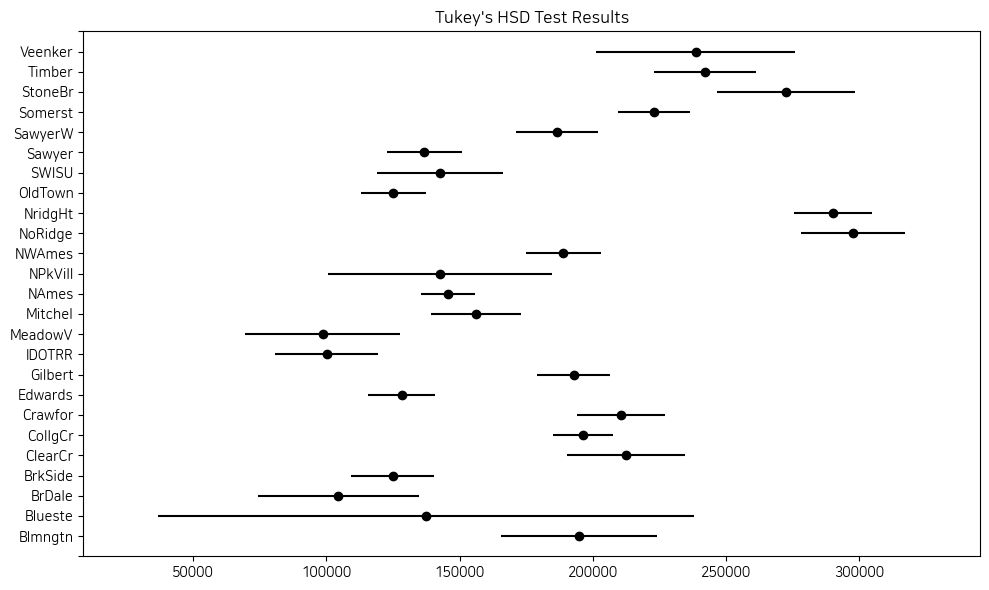

In [92]:
# 사후검정 (Tukey's HSD test)
import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(train3['SalePrice'], train3['Neighborhood'])
tukey_result = mc.tukeyhsd(alpha=0.05)

print("\n=== Tukey's HSD 사후검정 결과 ===")
print(tukey_result)

# 사후검정 결과 시각화
fig, ax = plt.subplots(figsize=(15, 6))
tukey_result.plot_simultaneous(ax=ax)
ax.set_title("Tukey's HSD Test Results")
plt.tight_layout()
plt.show()

### Neighborhood별 분석 결과 해석

- 기술통계량 분석
    + Neighborhood별로 SalePrice의 평균, 표준편차 등에서 상당한 차이를 보임
    + 일부 고급 주거지역(예: NridgHt, NoRidge)의 평균 판매가격이 높게 나타남

- 정규성 검정 (Shapiro-Wilk test)
    + 대부분의 Neighborhood에서 p-value가 0.05보다 작아 정규성 가정을 만족하지 않음
    + 이는 각 지역별 주택 가격이 비대칭적으로 분포되어 있음을 시사

- 등분산성 검정 (Levene test)
    + p-value가 매우 작아(< 0.05) 등분산성 가정을 기각
    + 각 지역별 주택 가격의 분산이 통계적으로 유의미하게 다름을 의미
    + 모수 통계 분산분석이 아닌, 비모수 통계 기법인 Welch Anova 사용

- ANOVA 및 사후검정
    + ANOVA 검정 결과 p-value가 매우 작아, Neighborhood간 평균 주택 가격에 유의미한 차이가 있음
    + Tukey's HSD 사후검정을 통해 어떤 지역 간에 유의미한 차이가 있는지 확인 가능
    + 특히 고급 주거지역과 저가 주거지역 간의 뚜렷한 가격 차이가 관찰됨

# 